In [1]:
%load_ext autoreload
%autoreload 2

# Business-as-usual analysis

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from ema_workbench import load_results
from unbreakable.analysis.analyzer import *
from unbreakable.analysis.visualizer import *
sns.set_theme(style="ticks")

In [23]:
# Parameters for report writing
savefig = True
savetab = True
figures_folder = '../../reports/Dominica/figures/analysis/'
tables_folder = '../../reports/Dominica/tables/analysis/'

## Load results

In [4]:
# Load results
country = 'Dominica'
n_scenarios = 2999
n_policies = 0
results = load_results(f'../../experiments/{country}/scenarios={n_scenarios}, policies={n_policies}.tar.gz')

# Prepare outcomes
outcomes = prepare_outcomes(results, add_uncertainties=False, add_policies=False)

## EDA

### Single scenario, single district 

In [5]:
# Print all outcomes for a single scenario
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('district', inplace=True)
# df.drop(columns=['weighted_vuln_quint', 'weighted_vuln_dec'], inplace=True)
numeric_columns = df.columns[3:-1].tolist()
df[numeric_columns].round(2).style.format("{:,.2f}")

,total_population,total_asset_loss,total_consumption_loss,tot_exposed_asset,tot_asset_surv,expected_loss_frac,n_affected_people,annual_average_consumption,povline_adjusted,district_pml,n_poor_initial,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_average_consumption_loss,annual_average_consumption_loss_pct,mean_recovery_rate,r,n_poor_ratio,n_new_poor_increase_pp
district,,,,,,,,,,,,,,,,,,,,,,
St. George,"20,445.41","191,556,888.72","156,500,453.90","1,002,936,475.89","1,090,939,278.78",0.20,"11,192.67","14,784.79","5,727.44","195,870,372.33","2,845.00","1,257.00",798.00,22.52,25.24,21.31,"1,398.24",8.62,0.31,3.00,14.00,3.90
St. John,"5,322.70","30,805,864.21","23,159,796.16","146,917,090.94","290,195,853.85",0.21,"2,928.58","8,118.78","3,154.05","30,721,128.56",564.00,229.00,144.00,15.16,18.31,15.47,790.82,9.68,0.26,1.22,11.00,2.71
St. Peter,"1,502.04","18,039,053.20","14,882,394.42","81,914,004.37","53,869,252.29",0.23,"1,045.51","16,389.16","9,473.39","18,961,436.29",356.00,223.00,22.00,24.74,27.50,26.20,"1,423.46",8.30,0.29,3.62,24.00,1.46
St. Joseph,"5,891.05","42,294,574.22","32,931,882.51","175,268,750.64","172,708,190.03",0.24,"4,157.37","9,239.21","6,322.37","42,688,959.00","2,739.00","2,077.00",29.00,32.92,37.21,36.86,792.13,8.47,0.25,1.37,46.00,0.49
St. Paul,"8,719.30","100,552,279.06","82,816,570.31","382,090,503.45","458,724,655.23",0.26,"6,952.62","14,179.57","5,189.22","99,840,454.14","2,830.00","2,213.00",404.00,33.32,38.35,34.27,"1,191.16",8.88,0.29,1.91,32.00,4.63
St. Luke,"1,452.45","11,150,543.03","9,256,305.78","41,700,575.95","54,234,426.75",0.27,"1,254.46","9,442.01","4,790.22","11,075,506.75",193.00,152.00,138.00,41.77,44.65,29.44,737.87,7.68,0.30,1.45,13.00,9.50
St. Mark,"2,114.61","23,006,082.39","18,722,434.89","125,273,541.49","92,369,121.62",0.19,"1,173.51","16,694.07","8,449.30","23,467,630.73",539.00,299.00,65.00,19.60,23.21,22.01,"1,595.43",9.20,0.28,3.33,25.00,3.07
St. Patrick,"8,477.02","37,588,837.18","29,313,615.94","149,203,255.36","316,146,421.73",0.25,"6,580.44","4,641.74","2,940.21","36,831,137.43","3,475.00","2,787.00",52.00,31.86,37.62,37.16,445.47,9.96,0.29,0.47,41.00,0.61
St. David,"7,023.69","25,242,813.56","18,332,923.77","114,881,153.80","434,305,654.83",0.22,"4,399.91","4,379.31","1,647.94","25,399,621.57","2,823.00","1,888.00",132.00,28.35,33.26,32.14,416.67,10.06,0.27,0.36,40.00,1.88


In [6]:
# Let's examine a single scenario in details
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('district', inplace=True)

# And a single district as an example
district = 'St. George'
print('District: ', district)
total_population = round(df.loc[district, 'total_population'])
n_affected = round(df.loc[district, 'n_affected_people'])
print('Total population: ', total_population)
print('Number of affected people: ', n_affected)

n_poor_initial = round(df.loc[district, 'n_poor_initial'])
n_new_poor = round(df.loc[district, 'n_new_poor'])
pct_poor_initial = round(n_poor_initial / total_population * 100, 2)
pct_new_poor = round((n_new_poor + n_poor_initial) / total_population * 100, 2)
pct_poor_increase = round(n_new_poor / total_population * 100, 2)
initial_poverty_gap = round(df.loc[district, 'initial_poverty_gap'], 2)
new_poverty_gap_init = round(df.loc[district, 'new_poverty_gap_initial'], 2)
new_poverty_gap_all = round(df.loc[district, 'new_poverty_gap_all'], 2)
print()
print('Number of poor: ', n_poor_initial)
print('Number of new poor: ', n_new_poor)
print(f'Percentage of poor: {pct_poor_initial}%')
print(f'Percentage of new poor: {pct_new_poor}%')
print(f'Percentage of increase in poor: {pct_poor_increase}%')
print('Initial poverty gap: ', initial_poverty_gap)
print('New poverty gap initial poor: ', new_poverty_gap_init)
print('New poverty gap all poor: ', new_poverty_gap_all)

annual_average_consumption = round(df.loc[district, 'annual_average_consumption'])
annual_average_consumption_loss = round(df.loc[district, 'annual_average_consumption_loss'])
annual_average_consumption_loss_pct = round(df.loc[district, 'annual_average_consumption_loss_pct'])
print()

print('Annual average consumption: ', annual_average_consumption)
print('Annual average consumption loss: ', annual_average_consumption_loss)
print(f'Annual average consumption loss percentage: {annual_average_consumption_loss_pct}%')

print()
r = round(df.loc[district, 'r'], 2)
print('Socio-economic resilience: ', r)

District:  St. George
Total population:  20445
Number of affected people:  11193

Number of poor:  2845
Number of new poor:  798
Percentage of poor: 13.92%
Percentage of new poor: 17.82%
Percentage of increase in poor: 3.9%
Initial poverty gap:  22.52
New poverty gap initial poor:  25.24
New poverty gap all poor:  21.31

Annual average consumption:  14785
Annual average consumption loss:  1398
Annual average consumption loss percentage: 9%

Socio-economic resilience:  3.0


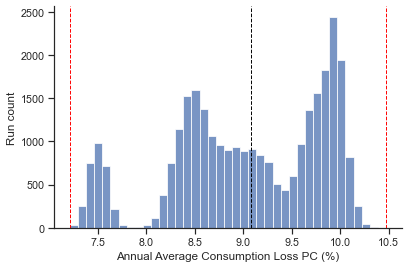

In [9]:
annotated_hist(outcomes, savefig=savefig, annotate=False)
plt.savefig(figures_folder + 'consumption_loss_hist.png', dpi=300, bbox_inches='tight')

In [ ]:
# # Print all outcomes for a single scenario
# district = 'St. George'
# df = outcomes[outcomes['district'] == district].copy()
# df.drop(columns=['years_in_poverty'], inplace=True)
# columns_of_interest = ['total_consumption_loss', 
#                        'n_affected_people', 'annual_average_consumption', 'n_new_poor', 'n_poor_affected',
#                        'annual_average_consumption_loss', 'annual_average_consumption_loss_pct', 'r', 'n_new_poor_increase_pp']
# sns.pairplot(df[columns_of_interest])
# plt.tight_layout();

### Multiple scenarios & multiple districts

In [21]:
# Let's aggregate across scenarios and take the mean
df = outcomes.iloc[:, 2:-1].groupby('district').mean(numeric_only=True).round(2)
df['fraction_affected'] = df['n_affected_people'] / df['total_population']
df['fraction_affected'].sort_values(ascending=False)

district
St. Luke       0.862364
St. Paul       0.797155
St. Patrick    0.751153
St. Peter      0.709202
St. Joseph     0.703881
St. Andrew     0.657208
St. David      0.612849
St. George     0.604579
St. Mark       0.580329
St. John       0.572065
Name: fraction_affected, dtype: float64

In [17]:
# Let's aggregate across scenarios and take the mean
outcomes.iloc[:, 2:-1].groupby('district').mean(numeric_only=True).round(2).sort_values(by='r', ascending=False)

,total_population,total_asset_loss,total_consumption_loss,tot_exposed_asset,tot_asset_surv,expected_loss_frac,n_affected_people,annual_average_consumption,povline_adjusted,district_pml,...,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_average_consumption_loss,annual_average_consumption_loss_pct,mean_recovery_rate,r,n_poor_ratio,n_new_poor_increase_pp
district,,,,,,,,,,,,,,,,,,,,,
St. Peter,1502.04,1.896870e+07,1.568461e+07,8.191400e+07,5.386925e+07,0.23,1065.25,16389.16,9473.39,1.896144e+07,...,21.88,24.74,28.04,26.75,1472.84,8.52,0.29,3.62,24.0,1.46
St. Mark,2114.61,2.347292e+07,1.910611e+07,1.252735e+08,9.236912e+07,0.19,1227.17,16694.07,8449.30,2.346763e+07,...,57.84,19.60,23.27,22.16,1557.80,9.20,0.28,3.19,25.0,2.74
St. George,20445.41,1.960046e+08,1.612865e+08,1.002936e+09,1.090939e+09,0.20,12360.87,14784.79,5727.44,1.958704e+08,...,935.00,22.52,26.65,21.92,1306.28,8.61,0.31,2.68,14.0,4.57
St. Paul,8719.30,1.000014e+08,8.174638e+07,3.820905e+08,4.587247e+08,0.26,6950.63,14179.57,5189.22,9.984045e+07,...,368.26,33.32,38.63,34.79,1176.81,8.94,0.29,1.87,32.0,4.22
St. Luke,1452.45,1.108260e+07,9.215979e+06,4.170058e+07,5.423443e+07,0.27,1252.54,9442.01,4790.22,1.107551e+07,...,122.69,41.77,44.82,30.55,735.88,7.50,0.30,1.49,13.0,8.45
St. Joseph,5891.05,4.269013e+07,3.348782e+07,1.752688e+08,1.727082e+08,0.24,4146.60,9239.21,6322.37,4.268896e+07,...,34.06,32.92,36.76,36.36,808.05,8.38,0.25,1.47,46.0,0.58
St. John,5322.70,3.072690e+07,2.307840e+07,1.469171e+08,2.901959e+08,0.21,3044.93,8118.78,3154.05,3.072113e+07,...,125.09,15.16,19.39,16.82,758.56,9.69,0.26,1.14,11.0,2.35
St. Andrew,10246.50,4.920227e+07,3.775457e+07,2.191651e+08,3.961981e+08,0.22,6734.08,5888.36,3446.25,4.919595e+07,...,355.74,39.45,43.30,40.17,561.01,9.74,0.28,0.64,38.0,3.47
St. Patrick,8477.02,3.685159e+07,2.881078e+07,1.492033e+08,3.161464e+08,0.25,6367.54,4641.74,2940.21,3.683114e+07,...,48.80,31.86,37.26,36.82,452.65,9.96,0.30,0.48,41.0,0.58


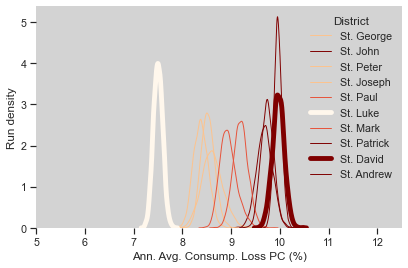

In [10]:
coloured_density_plots(outcomes, savefig, scheme='fisher_jenks', k=4)
plt.savefig(figures_folder + 'consumption_loss_density.png', dpi=300, bbox_inches='tight')

In [63]:
tab = outcomes.iloc[:, 2:-1].groupby('district').describe().round(2)
column = 'n_new_poor'
tab = tab.sort_values(by=(column, 'mean'), ascending=False)
tab[[column]].iloc[:,1:].style.format("{:,.2f}")

## Weeks in poverty & Number of new poor

In [20]:
average_years_in_poverty = {}
for district in outcomes['district'].unique():
    df = outcomes[outcomes['district'] == district].copy()
    total_years_in_poverty = {}
    for d in df['years_in_poverty']:
        for key, value in d.items():
            total_years_in_poverty[key] = total_years_in_poverty.get(key, 0) + value
    average_years_in_poverty[district] = {k: v / len(df) for k, v in total_years_in_poverty.items()}
average_years_in_poverty = pd.DataFrame(average_years_in_poverty).T

In [24]:
average_years_in_poverty = get_weeks_in_poverty_tab(outcomes)

if savetab:
    # average_years_in_poverty.rename({'Anse-La-Raye & Canaries': 'Anse-La-Raye \& Canaries'}, inplace=True, axis=0)
    average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')\
        .to_latex(tables_folder + 'av_years_in_pov.tex',
                  # escape=False,
                  caption='Average Years in Poverty By District',
                  label='tab:av_years_in_pov',
                  convert_css=True,
                  multicol_align="|c|",
                  hrules=True,
                  position_float="centering")

In [30]:
# Number of people in poverty for 1 / 3 / 5 years

In [31]:
# More than 1 year in poverty
n_years = 1
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

District
St. George     935.354451
St. John       125.142714
St. Peter       21.675225
St. Joseph      34.059353
St. Paul       368.672891
St. Luke       122.515839
St. Mark        57.563188
St. Patrick     48.288429
St. David      159.967656
St. Andrew     355.672558
dtype: float64

In [32]:
# More than 3 years in poverty
n_years = 3
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

District
St. George     935.354451
St. John       125.142714
St. Peter       21.675225
St. Joseph      34.059353
St. Paul       368.672891
St. Luke       122.515839
St. Mark        57.563188
St. Patrick     48.288429
St. David      159.967656
St. Andrew     355.672558
dtype: float64

In [33]:
# More than 5 years in poverty
n_years = 5
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

District
St. George     379.269423
St. John        53.883961
St. Peter       11.051017
St. Joseph      34.059353
St. Paul       159.033678
St. Luke       113.694231
St. Mark        49.417472
St. Patrick     24.010670
St. David      159.967656
St. Andrew     161.071024
dtype: float64

In [34]:
average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')

,0,1,2,3,4,5,6,7,8,9,10
District,,,,,,,,,,,
St. George,0,0,0,110,445,51,17,205,69,35,0
St. John,0,0,0,71,0,0,35,18,0,0,0
St. Peter,0,0,0,10,0,0,0,11,0,0,0
St. Joseph,0,0,0,0,0,34,0,0,0,0,0
St. Paul,0,0,0,209,0,0,52,106,0,0,0
St. Luke,0,0,0,0,8,52,43,17,0,0,0
St. Mark,0,0,0,8,0,0,0,0,49,0,0
St. Patrick,0,0,0,0,24,0,24,0,0,0,0
St. David,0,0,0,0,0,140,19,0,0,0,0


In [36]:
# Get the number of new poor in each district
districts = outcomes['district'].unique().tolist()
n_districts = len(districts)
d = {}
for district in districts:
    df = outcomes[outcomes['district'] == district]
    d[district] = df['n_new_poor'].values.tolist()

In [37]:
# Make a coloured table
tab = pd.DataFrame(d).describe().T.sort_values('mean', ascending=False).round(2).drop('count', axis=1)
tab.style.background_gradient(cmap='Blues', subset=['mean'])\
         .background_gradient(cmap='Reds', subset=['std'])\
         .background_gradient(cmap='Oranges', subset=['min'])\
         .background_gradient(cmap='Greens', subset=['25%'])\
         .background_gradient(cmap='Greens', subset=['50%'])\
         .background_gradient(cmap='Greens', subset=['75%'])\
         .background_gradient(cmap='Purples', subset=['max'])\
         .format(decimal='.', thousands=',', precision=0)

,mean,std,min,25%,50%,75%,max
St. George,935,180,316,818,940,"1,060","1,450"
St. Paul,368,45,163,339,371,400,461
St. Andrew,356,63,103,312,358,400,518
St. David,160,35,39,137,161,185,247
St. John,125,28,33,106,125,144,209
St. Luke,123,9,82,116,124,130,142
St. Mark,58,11,23,50,58,66,94
St. Patrick,49,9,13,42,50,57,65
St. Joseph,34,10,0,29,39,39,48
St. Peter,22,3,12,20,22,24,30


In [30]:
# Get the number of new poor in each district
districts = outcomes['district'].unique().tolist()
n_districts = len(districts)
d = {}
for district in districts:
    df = outcomes[outcomes['district'] == district]
    d[district] = df['n_new_poor_increase_pp'].values.tolist()

In [34]:
# Make a coloured table
tab = pd.DataFrame(d).describe().T.sort_values('mean', ascending=False).round(2).drop('count', axis=1)
tab.style.background_gradient(cmap='Blues', subset=['mean'])\
         .background_gradient(cmap='Reds', subset=['std'])\
         .background_gradient(cmap='Oranges', subset=['min'])\
         .background_gradient(cmap='Greens', subset=['25%'])\
         .background_gradient(cmap='Greens', subset=['50%'])\
         .background_gradient(cmap='Greens', subset=['75%'])\
         .background_gradient(cmap='Purples', subset=['max'])\
         .format(decimal='.', thousands=',', precision=2)

,mean,std,min,25%,50%,75%,max
St. Luke,8.45,0.64,5.65,7.99,8.54,8.95,9.78
St. George,4.57,0.88,1.55,4.00,4.60,5.18,7.09
St. Paul,4.22,0.52,1.87,3.89,4.25,4.59,5.29
St. Andrew,3.47,0.62,1.01,3.04,3.49,3.90,5.06
St. Mark,2.74,0.52,1.09,2.36,2.74,3.12,4.45
St. John,2.35,0.53,0.62,1.99,2.35,2.71,3.93
St. David,2.28,0.50,0.56,1.95,2.29,2.63,3.52
St. Peter,1.46,0.17,0.80,1.33,1.46,1.60,2.00
St. Joseph,0.58,0.17,0.00,0.49,0.66,0.66,0.81
St. Patrick,0.58,0.11,0.15,0.50,0.59,0.67,0.77


## Average vulnerability

In [23]:
# vulnerability_by_quintile = get_average_weighted_vulnerability(outcomes, quintile=True)
# vulnerability_by_quintile.T.style.format("{:.2f}")

In [24]:
# vulnerability_by_decile = get_average_weighted_vulnerability(outcomes, quintile=False)
# vulnerability_by_decile.T.style.format("{:.2f}")

## Raincloud plots

Raincloud plot is a combination of a boxplot, a kernel density plot, and a dot plot. It is a great way to visualize the distribution of the data. Especially, when the distribution is skewed and you have a lot of data points.

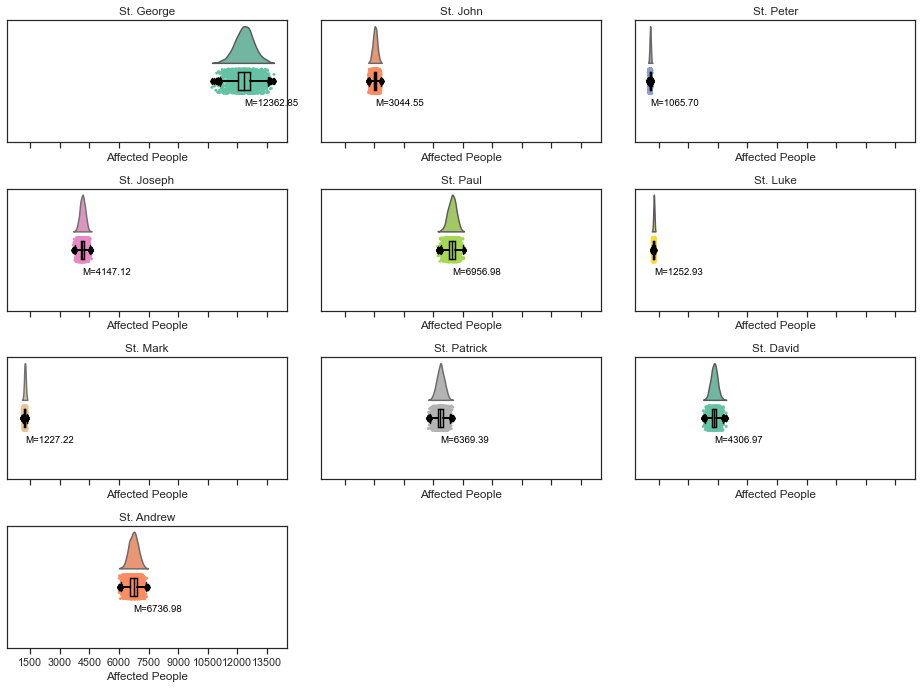

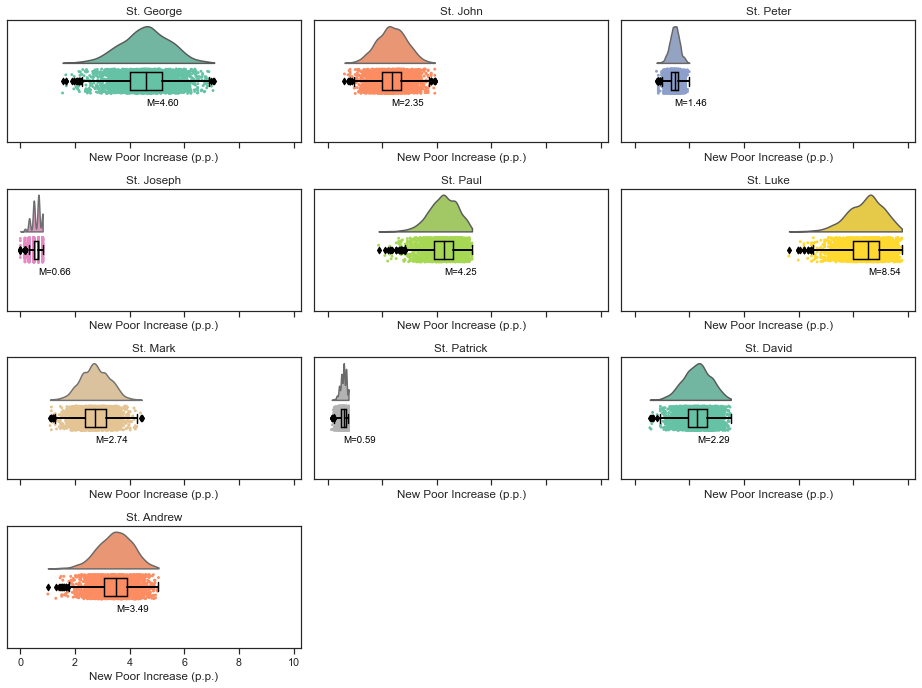

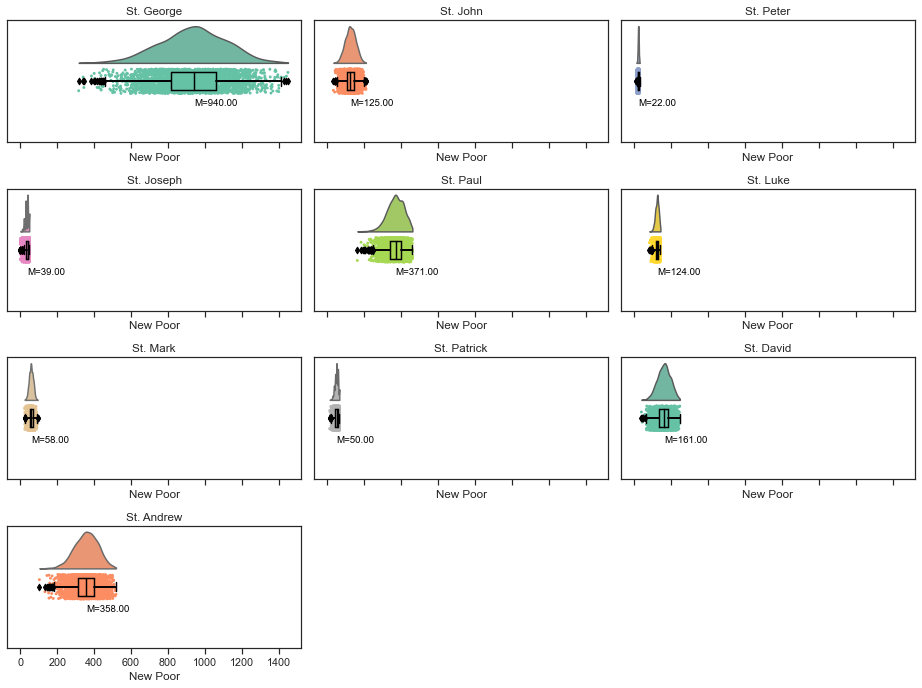

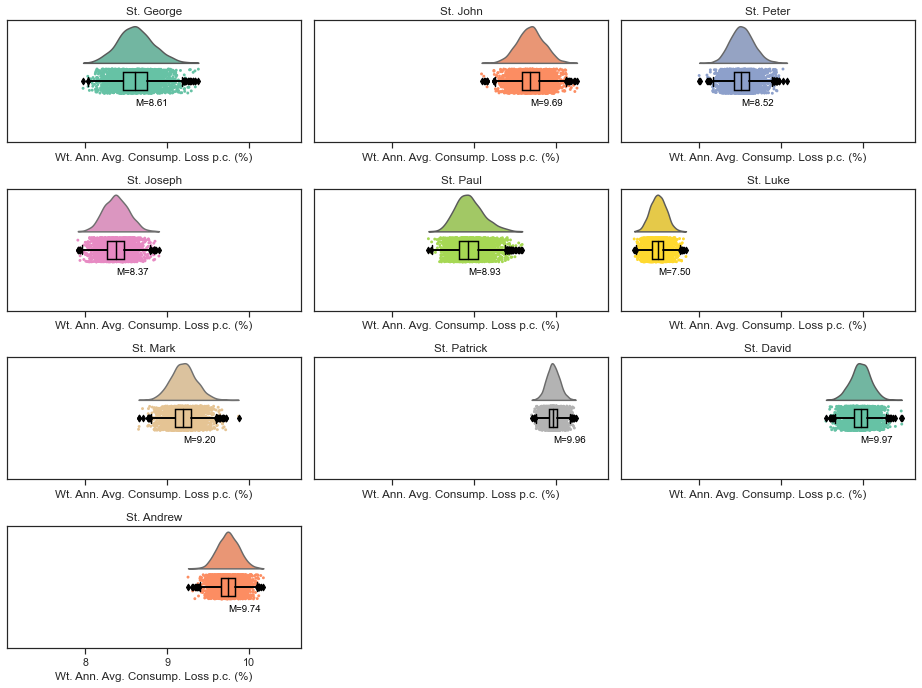

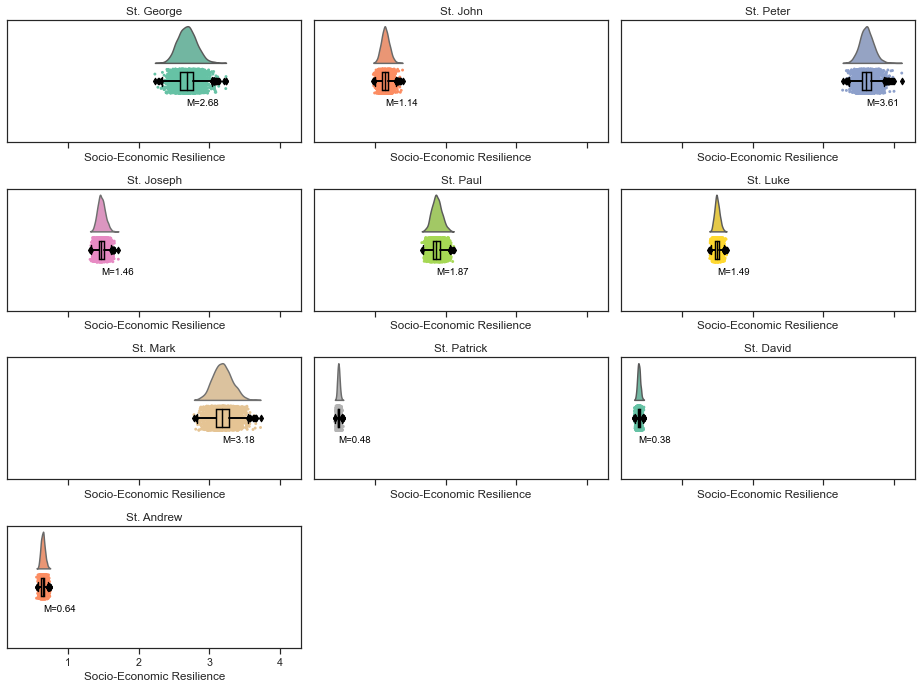

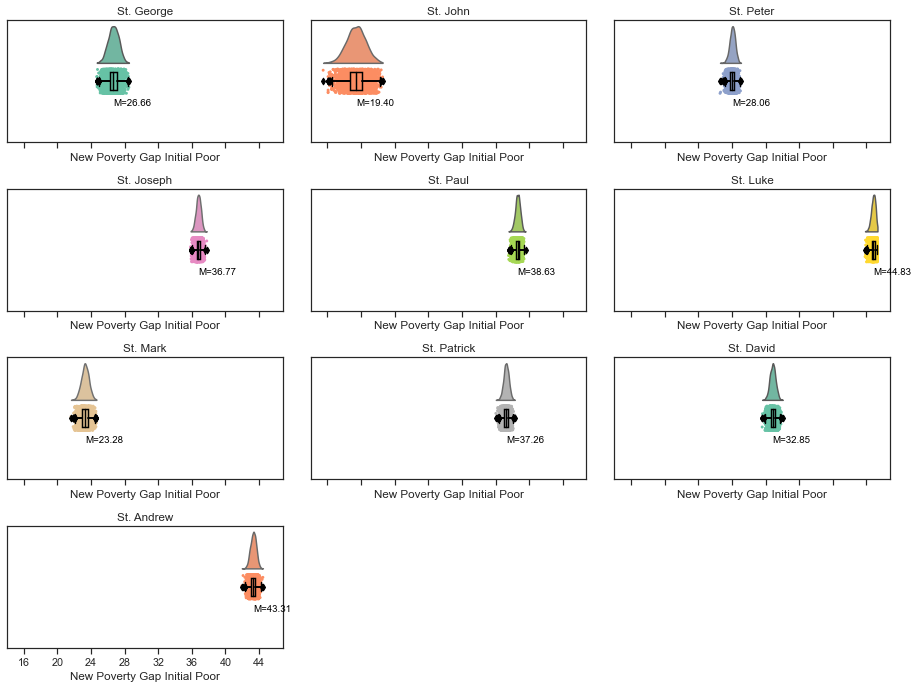

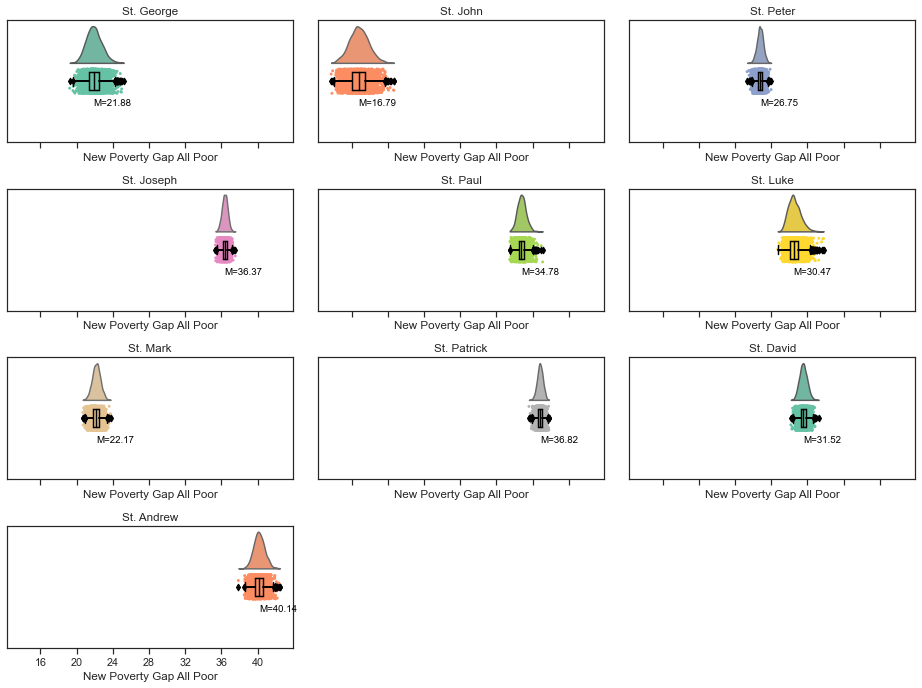

In [73]:
outcomes['policy'] = 'None'
raincloud_plot(outcomes, savefig=savefig)

## Outcomes spatially

Another way to visualize the outcomes is to use choropleth maps. These maps are useful when you have data that is aggregated by a geographic area. For example, if we have data on how many people became poor after a disaster in the districts of Saint Lucia, we could use a choropleth map to show these numbers.  

What is important to remember is that **these maps do not show the variance** within each district. Instead, they show the mean or median value for each district.

In [11]:
# Get the country shapefile and aggregated outcomes
aggregation = 'median'
country = 'Dominica'
aggregated_outcomes = get_spatial_outcomes(outcomes=outcomes, country=country, aggregation=aggregation)

# Convert to be in millions
aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss', 'district_pml']] /= 1000000
aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss', 'district_pml']] = aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss', 'district_pml']].round(2)


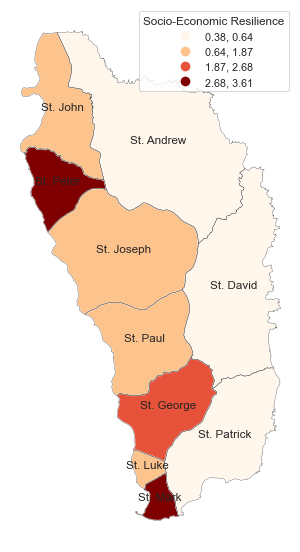

In [13]:
k = 4
# column = 'annual_average_consumption_loss_pct'
# title = 'Ann. Av. Cons. Loss PC (%)'
column = 'r'
title = 'Socio-Economic Resilience'
# column = 'pml_relative'
# title = 'PML (%)'

cmap = 'OrRd'
scheme = 'fisher_jenks'
ax = aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, figsize=(10,10), legend_kwds={"title":title, "loc" : "upper right"})
aggregated_outcomes.plot(ax=ax, color='none', edgecolor='black', linewidth=0.25)
ax.axis('off')
for idx, row in aggregated_outcomes.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
plt.savefig('pml.png', dpi=300, bbox_inches='tight')
if savefig:
    plt.savefig(figures_folder + f'soc_econ_res_map.png', dpi=300, bbox_inches='tight')

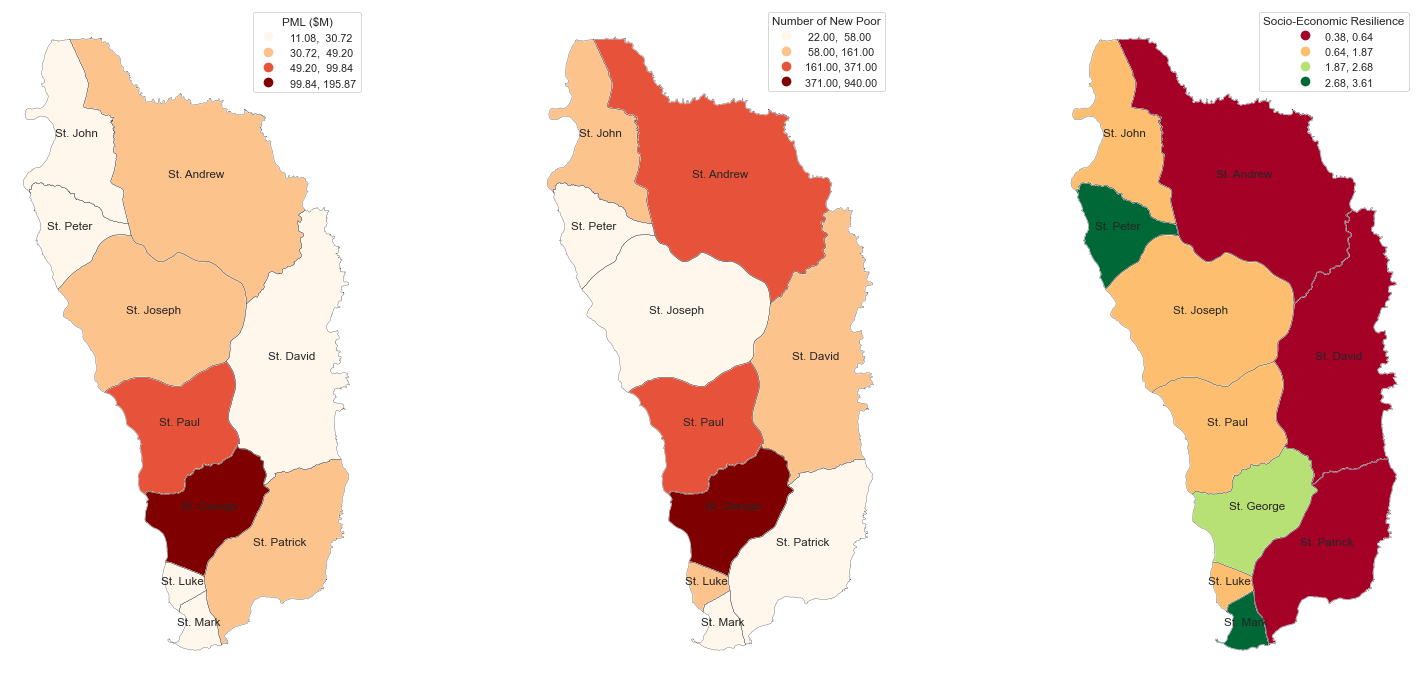

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(24,10))
k = 4
columns = ['district_pml', 'n_new_poor', 'r']
titles = ['PML ($M)', 'Number of New Poor', 'Socio-Economic Resilience']
cmaps = ['OrRd', 'OrRd', 'RdYlGn']

scheme = 'fisher_jenks'
for i, column in enumerate(columns):
    title = titles[i]
    cmap = cmaps[i]
    aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, ax=ax[i], legend_kwds={"title":title, "loc" : "upper right"})
    aggregated_outcomes.plot(ax=ax[i], color='none', edgecolor='black', linewidth=0.25)
    ax[i].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i].annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
plt.tight_layout()
if savefig:
    plt.savefig(figures_folder + f'soc_econ_res_map.png', dpi=300, bbox_inches='tight')

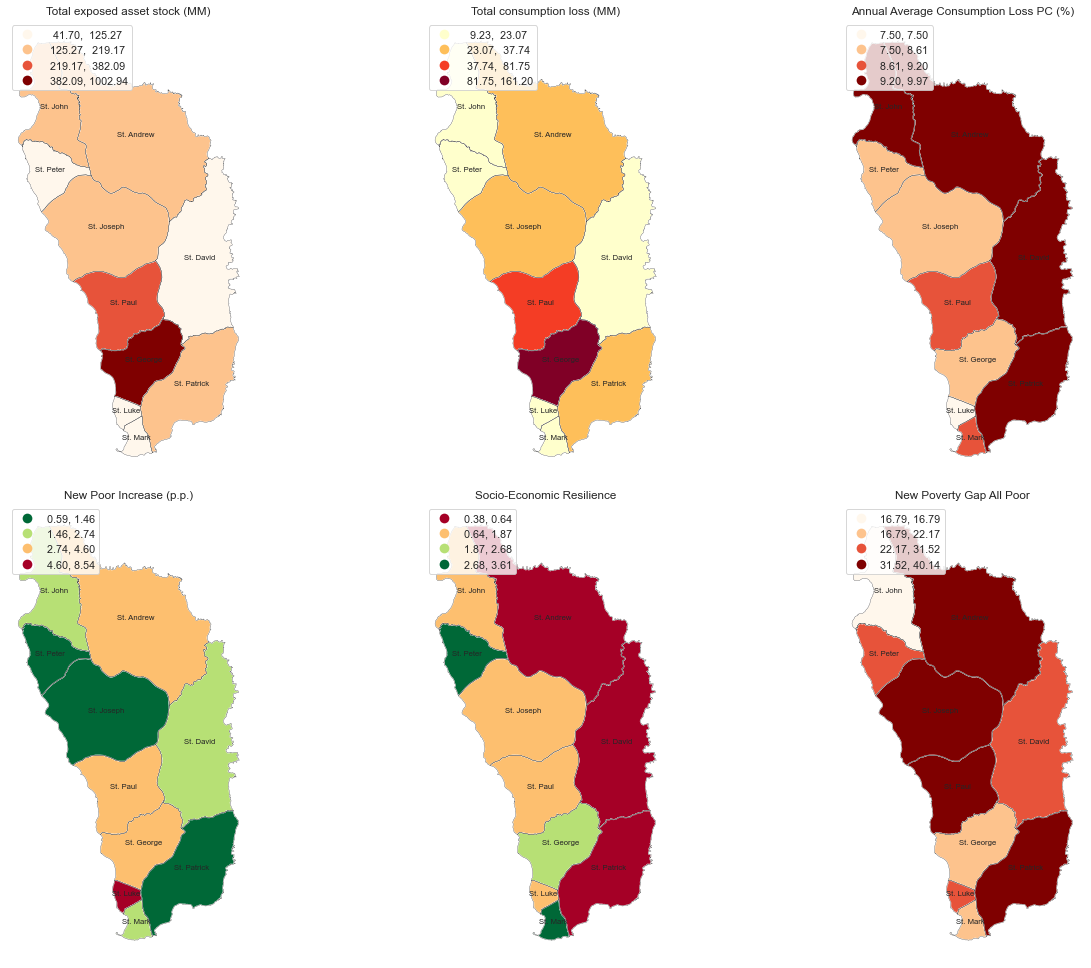

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 14))

outcomes_to_plot = [
    'tot_exposed_asset',
    'total_consumption_loss',
    'annual_average_consumption_loss_pct',
    'n_new_poor_increase_pp',
    'r',
    'new_poverty_gap_all']

titles = ['Total exposed asset stock (MM)',
          'Total consumption loss (MM)',
          # 'Wt. Ann. Avg. Consump. Loss p.c. (%)',
          'Annual Average Consumption Loss PC (%)',
          'New Poor Increase (p.p.)',
          'Socio-Economic Resilience',
          'New Poverty Gap All Poor']

cmaps = ['OrRd', 'YlOrRd', 'OrRd', 'RdYlGn_r', 'RdYlGn', 'OrRd']

k = 4
for i, outcome in enumerate(outcomes_to_plot):
    aggregated_outcomes.plot(column=outcome, scheme='fisher_jenks', cmap=cmaps[i], k=k, ax=ax[i//3, i % 3], legend=True, legend_kwds={"loc": "upper left"})
    aggregated_outcomes.plot(ax=ax[i//3, i % 3], color='none', edgecolor='black', linewidth=0.25)
    ax[i//3, i % 3].set_title(titles[i])
    ax[i//3, i % 3].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i//3, i % 3].annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

# fig.suptitle(f'{aggregation.capitalize()} of 3,000 replications', fontsize=16)

fig.tight_layout()
if savefig:
    plt.savefig(figures_folder +
        f'{aggregation}_outcomes_spatially.png', dpi=300, bbox_inches='tight')

A bivariate or bi-variate choropleth helps to visualise relations between two variables spatially. 

In [118]:
# Load asset damage data
# asset_damage = pd.read_excel('../data/processed/asset_damage/Saint Lucia.xlsx')
# asset_damage['district'].replace({'AnseLaRayeCanaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
# gdf = pd.merge(aggregated_outcomes, asset_damage, left_on='NAME_1', right_on='district', how='left')

In [92]:
# x_name = 'r'
# y_name = 'pml'
# x_label = 'Soc.-econ. res.'
# y_label = 'PML'

# tab = bivariate_choropleth(gdf.copy(), x_name, y_name, x_label, y_label, scheme='fisher_jenks', figsize=(7,6), return_table=True)
# if savefig:
#     plt.savefig('../reports/figures/analysis/bivariate_choropleth.png', dpi=300, bbox_inches='tight')

In [93]:
# nine_quadrants_plot(gdf.copy(), x_name, y_name)
# plt.xlabel('Socio-Economic Resilience')
# plt.ylabel('PML')
# if savefig:
#     plt.savefig('../reports/figures/analysis/9_quadrants.png', dpi=300, bbox_inches='tight')